# Image Classifier for MNIST Dataset with TensorFlow and Keras

In this example we want to show how to set up a basic image classifier that can recognize any kind of MNIST Dataset with the help of TensorFlow and Keras.

1.   Import libraries & dataset
2.   Exploring the data
3.   Preprocess the data
4.   Build the model
5.   Train the model
6.   Test the model




## 1. Import libraries & dataset

The first step is to import the TensorFlow library which also includes Keras. Then we import some helper libraries which we will need later to show some graphics.

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


The next step is to import a MNIST dataset from keras and split it up into training data and test data. The great thing about this classifier is that you can choose any mnist dataset from keras and it will work. Here we choose the two most popular datasets, one for handwriting detection and one that detects clothes.

In [2]:
mnist = tf.keras.datasets.mnist
#mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Each image is labled with a name but they are not included in the dataset so lets create them.

In [3]:
class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Exploring the data

In this section we are going to explore the data a bit more. This is important to create a more fitting model afterwards.

In [4]:
train_images.shape #60,000 labels in the training set

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels #Each label is an integer between 0 and 9:

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape #There are 10,000 images in the test set with 28 x 28 pixels:

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## Preprocess the data

Before we can train our model we need to do one more step. Prepocess our data. To do so we first inspect one Image of our dataset. In this image we can see that we have a pixel value range from 0 to 255.

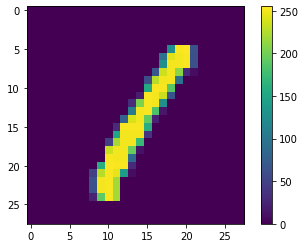

In [9]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

That would be too much for our model so we scale them down to a range from 0 to 1. 

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Now that we got that out of the way, lets take a look at our data again and see if everything is correct until now. To do so we print out a few images with their labels.

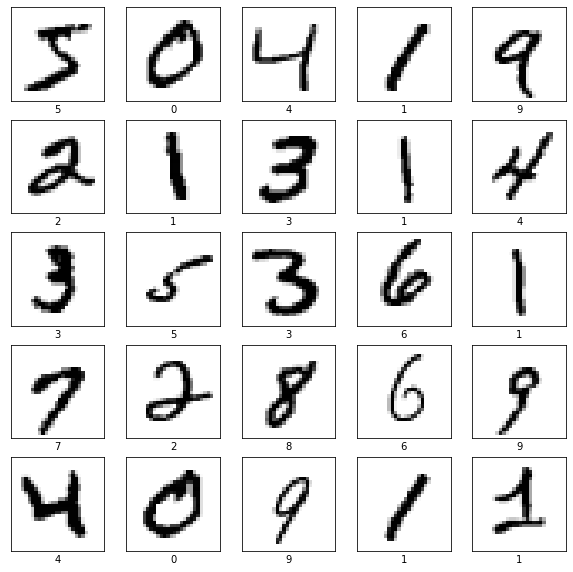

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Now that our input data is correct we can start building our model.

The first step is to set up the layers. Layers extract representations from the data fed into them.

The first layer is a keras-Flatten layer wich transfroms a two dimenstional array in an one dimensional one.

The second and third layer are keras-Dense layers these layers are densley / fully connected neural layers. The first one with 128 nodes and the second one with 10 nodes.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In the compile step a few extra parameters are added to the model.

1. Optimizer: How the model is updated based on the data it sees and its loss function.

2. Loss function: Measures how accurate the model is during training.

3. Metrics: Used to monitor the trining and testing steps.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

The first step is to feed the model with data. To do so we use a method called model.fit - it "fits" the model to the training data.

The epochs indicate how often the model runs. More runs = more accurate model.

As the model trains, the loss and accuracy metrics are displayed.

In [14]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.2565 - accuracy: 0.9265


In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.1399 - accuracy: 0.9598

Test accuracy: 0.9598000049591064


In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])
test_labels[0]

7

In [17]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

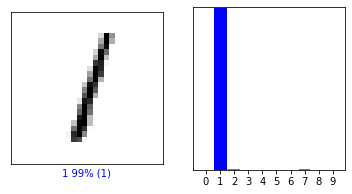

In [18]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

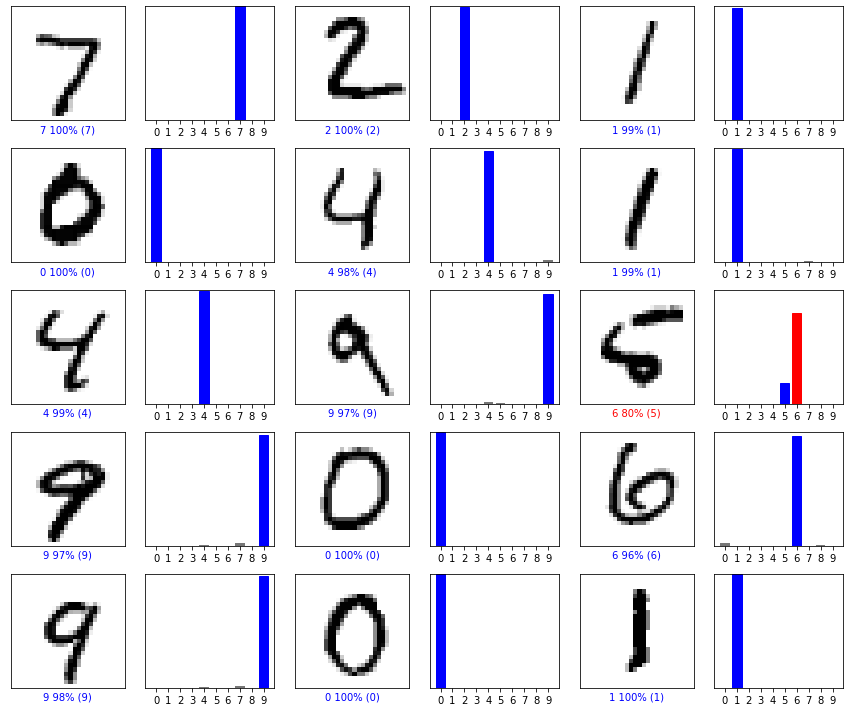

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
img = test_images[5]
print(img.shape)

(28, 28)


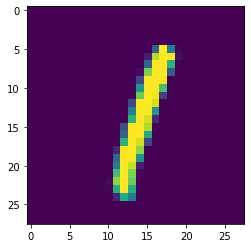

In [29]:
plt.imshow(img)

In [31]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.8566661e-06 9.9207002e-01 2.2497975e-04 1.0514213e-04 5.2003281e-05
  1.1760125e-05 3.2574446e-06 7.2947792e-03 1.6389960e-04 7.2437972e-05]]


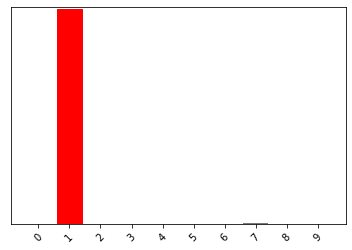

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)